# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание проекта
Для исследования представлены данные о клиентах Банка: 

    -характеристики клиента: пол, возраст, страна проживания, идентификаторы, кредитный рейтинг, предполагаемая зарплата;
    -данные об активности клиента: количество продуктов, используемых клиентом, наличие кредитной карты, баланс на счете, сколько лет является клиентом банка, активность клиента;
    -данные о факте ухода клиента из банка (расторжение договора с банком)

Поставлена задача на основе представленных данных спрогнозировать уход клиента из банка (расторжении договора).

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from joblib import dump

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

data = pd.read_csv('Churn.csv')

### Просмотр данных

In [2]:
display(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
#посмотрим соотношение представленных исходов в колонке целевого признака:

print(data['Exited'].sum()/len(data)*100)


20.369999999999997


In [5]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
#исследуем спектр данных в колонках с признаками. В данном случае предполагаемый состав данных 
#позволяет изучить их визуально с агрегированием по уникальным значениям

print('Exited')
display(data['Exited'].unique())
print('CreditScore')
display(data['CreditScore'].unique())
print('Geography')
display(data['Geography'].unique())
print('Gender')
display(data['Gender'].unique())
print('Age')
display(data['Age'].unique())
print('Tenure')
display(data['Tenure'].unique())
print('HasCrCard')
display(data['HasCrCard'].unique())
print('IsActiveMember')
display(data['IsActiveMember'].unique())



Exited


array([1, 0], dtype=int64)

CreditScore


array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

Geography


array(['France', 'Spain', 'Germany'], dtype=object)

Gender


array(['Female', 'Male'], dtype=object)

Age


array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

Tenure


array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

HasCrCard


array([1, 0], dtype=int64)

IsActiveMember


array([1, 0], dtype=int64)

### Заполнение пропусков

In [7]:
#заполним пропуски в столбце 'Tenure' 
tenure_mean=data['Tenure'].mean()

print(tenure_mean)

#просмотр остальных данных в столбце показал, что данные представлены без дробной части

tenure_mean=int(tenure_mean+1)

data['Tenure'] = data['Tenure'].fillna(tenure_mean)

4.997690023099769


Заполнены пропуски данных - сведения о сроке взаимоотношений с банком в 909 строках. Используем для заполнения пропусков среднее значение по остальным данным. Предполагаем, что клиенты с отсутствующими данными также некоторое время являются клиентами банка (имеют несколько продуктов, иные характеристики отношений), например, отсутствие данных может быть связано с тем, что учет "старых" клиентов велся в другой системе и пр.


In [8]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Поиск аномальных значений

In [9]:
#рассмотрим численные данные с целью выявления возможных ошибок и аномальных значений

print(data[['Age','CreditScore','Tenure','EstimatedSalary']].describe())

                Age   CreditScore       Tenure  EstimatedSalary
count  10000.000000  10000.000000  10000.00000     10000.000000
mean      38.921800    650.528800      4.99790    100090.239881
std       10.487806     96.653299      2.76001     57510.492818
min       18.000000    350.000000      0.00000        11.580000
25%       32.000000    584.000000      3.00000     51002.110000
50%       37.000000    652.000000      5.00000    100193.915000
75%       44.000000    718.000000      7.00000    149388.247500
max       92.000000    850.000000     10.00000    199992.480000


### Отбор признаков

In [10]:
# отберем данные, которые будем рассматривать как признаки для модели:

features = data.drop(['CustomerId','RowNumber','Surname'], axis=1)


In [11]:
#проверяем, что осталось:

display(features.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Преобразование признаков

In [12]:
#преобразуем категориальные признаки в численные техникой прямого кодирования One-Hot Encoding

features = pd.get_dummies(features, drop_first=True)

In [13]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


### Разделение выборки

In [14]:
#разделим данные на две выборки: обучающую и другую (далее она будет разделена на тестовую и валидационную)
features_train, features_other=train_test_split(features,test_size=0.4, random_state=12345)

#разделим "другую" выборку на валидационную и тестовую
features_valid, features_test=train_test_split(features_other,test_size=0.5, random_state=12345)


#создадим переменные для признаков и целевого признака в обучающей выборке
y_train=features_train['Exited']
x_train=features_train.drop(['Exited'],axis=1)


#создадим переменные для признаков и целевого признака в тестовой выборке
y_valid=features_valid['Exited']
x_valid=features_valid.drop(['Exited'],axis=1)


#создадим переменные для признаков и целевого признака в валидационной выборке
y_test=features_test['Exited']
x_test=features_test.drop(['Exited'],axis=1)


#выведем на экран данные о размере выборок и целевых признаках

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


In [15]:
#отнормируем данные разного масштаба

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']

scaler = StandardScaler()
scaler.fit(x_train[numeric]) 
x_train[numeric] = scaler.transform(x_train[numeric])
x_valid[numeric] = scaler.transform(x_valid[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

display(x_train.head())
display(x_valid.head())
display(x_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,1,0,0,1.524268,1,0,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.101690,-1.233163,2,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.737696,-1.233163,1,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.829679,0.438711,1,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.810266,1.239884,1,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.810266,-1.233163,2,1,0,1.358533,0,1,1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.101690,-1.233163,2,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.446272,-1.233163,1,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,-0.009707,0.722307,1,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.810266,-1.233163,2,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.810266,0.615625,1,0,1,-1.070919,0,0,1


**Вывод:** 

Просмотр данных показал, что всего представлены 10000 записей. Пропуски в данных обнаружены в столбце 'Tenure' "Сколько лет человек является клиентом Банка". Пропуски заполнены средними значениями сроков отношений клиентов и банка в выборке.

Типы данных соответствуют требуемым для анализа в соответствии с соджержанием данных согласно описанию и задачам исследования. 

Данные об уникальных значениях и характеристики стодбцов с количественными значениями аномальных значений (отрицательный или недостаточный возраст, отрицательная зарплата и пр.) не выявлено.

В датафрейме для целей дальнейшего обучения моделей оставили только данные, которые могут рассматриваться как влияющие признаки. 

Данные разделены на 3 выборки: обучающую, валидационную и тестовую. На тестовую выборку 20% данных. Преобразовали категориальные данные в численные методом ОНЕ (выбрали технику кодирования, которая позволит получить данные, пригодные для различных моделей). Далее данные были отнормированы, приведены к сопоставимому масштабу.

## Исследование задачи

### Изучение баланса классов

In [16]:
#посмотрим соотношение представленных исходов в колонке целевого признака:

print(data['Exited'].sum()/len(data)*100)


20.369999999999997


Около 20% позиций в выборке описывают данные по клиентам, расторгнувшим договор с Банком (20,37% выборки положительный класс). Это существенно меньше общей совокупности данных и данных об остальных клиентах. Выборку можно считать несбалансированной. В первую очередь обучим и проанализируем модели без учета дисбаланса классов. 

### Логистическая регрессия

In [17]:
#обучим модель логистической регрессии без учета дисбаланса классов:

model = LogisticRegression(random_state=12345, solver='liblinear')

model.fit(x_train, y_train)
predicted_valid = model.predict(x_valid)
    
probabilities_valid = model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
    
auc_roc_LR= roc_auc_score(y_valid,probabilities_one_valid)

print("F1:", f1_score(y_valid, predicted_valid))
print("auc-roc", auc_roc_LR)



F1: 0.33108108108108103
auc-roc 0.7586620412656742


Вывод: Получен низкий результат метрики F1 на валидационной выборке.Также довольно низкое значение auc-roc

### Решающее дерево

In [18]:
#обучим модель на основе дерева решений с перебором гиперпараметра depth - глубина дерева, выбираем лучшую модель
best_auc_roc_tree=0
best_result_tree=0

for depth in range(1,15):
    model_tree=DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(x_train,y_train)
    
    predicted_valid=model_tree.predict(x_valid)
    result_tree=f1_score(y_valid,predicted_valid)
    
    probabilities_valid = model_tree.predict_proba(x_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc_tree= roc_auc_score(y_valid,probabilities_one_valid)
         
    if result_tree > best_result_tree:
        best_result_tree = result_tree
        d = depth
        best_auc_roc_tree=auc_roc_tree

print("Depth лучшей модели дерева решений", d, " F1: ", best_result_tree," auc-roc:", best_auc_roc_tree)

Depth лучшей модели дерева решений 6  F1:  0.5696969696969697  auc-roc: 0.8164631712023421


**Перебор гиперпараметра 'depth' наилучий результат модели по метрике F1 дал при значении гиперпараметра 'depth'=6. Значение F1 модели ниже заданного значения 0.59, auc-roc: 0.8164631712023421**

### Случайный лес

In [19]:
model_forest=RandomForestClassifier(random_state=12345,n_estimators=17,max_depth=22)
model_forest.fit(x_train,y_train)
predicted_valid=model_forest.predict(x_valid)
result_forest = f1_score(y_valid, predicted_valid)
 
probabilities_valid = model_forest.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
    
auc_roc_forest= roc_auc_score(y_valid,probabilities_one_valid)
         
print(" F1 RandomForestClassifier : ", result_forest, " auc-roc:", auc_roc_forest)  

 F1 RandomForestClassifier :  0.5647743813682677  auc-roc: 0.8203700119163557


In [20]:
# Обучим модель на основе случайного леса с перебором гиперпараметров, выбираем лучшую модель.
# Для перебора гиперпараметра 'n_estimators' зафиксируем некоторое значение 'depth' максимальной глубины дерева
best_auc_roc_forest=0
best_result_forest=0

for est in range(1,300):
    model_forest=RandomForestClassifier(random_state=12345,n_estimators=est,max_depth=22)
    model_forest.fit(x_train,y_train)
    predicted_valid=model_forest.predict(x_valid)
    result_forest = f1_score(y_valid, predicted_valid)
    
    probabilities_valid = model_forest.predict_proba(x_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc_forest= roc_auc_score(y_valid,probabilities_one_valid)
         
    if result_forest > best_result_forest:
        best_result_forest = result_forest
        n_est = est
        best_auc_roc_forest=auc_roc_forest
        
print("Est лучшей модели", n_est, " F1: ",best_result_forest, " auc-roc:", best_auc_roc_forest)


Est лучшей модели 127  F1:  0.5952380952380952  auc-roc: 0.8416266430355858


In [21]:
best_auc_roc_forest=0
best_result_forest=0

for depth in range(1,300):
    model_forest=RandomForestClassifier(random_state=12345,n_estimators=17,max_depth=depth)
    model_forest.fit(x_train,y_train)
    predicted_valid=model_forest.predict(x_valid)
    result_forest = f1_score(y_valid, predicted_valid)
    
    probabilities_valid = model_forest.predict_proba(x_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_forest= roc_auc_score(y_valid,probabilities_one_valid)
    
if result_forest > best_result_forest:
        best_result_forest = result_forest
        best_depth = depth
        best_auc_roc_forest=auc_roc_forest
        
print("depth лучшей модели", best_depth, " F1: ", best_result_forest, " auc-roc:", best_auc_roc_forest)        
 

depth лучшей модели 299  F1:  0.5606936416184971  auc-roc: 0.8244280754178286


Вывод: Метрика F1  моделей LogisticRegression, DecisionTreeClassifier ниже заданного значения 0,59.

**Наилучшее значение метрики F1 получено при обучении модели RandomForestClassifier с гиперпараметрами: n_estimators=127,max_depth=22  F1:  0.5952380952380952  auc-roc: 0.8416266430355858.** 

Продолжим исследование, применив различные методы корректировки дисбаланса в выборке.

## Борьба с дисбалансом

### Применение балансирующего параметра в модели.

In [22]:
#обучим модель логистической регресии с параметром, балансирующим классы:

model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')

model.fit(x_train, y_train)
predicted_valid_LR = model.predict(x_valid)

print("F1_LR:", f1_score(y_valid, predicted_valid_LR))

F1_LR: 0.4888507718696398


**Метрика F1 модели логистической регессии с учетом баланса классов существенно увеличилась по сравнению с F1 логистической регрессии без учета баланса, рассчитанной в п. 3.1 (0.33108108108108103)**

In [23]:
#обучим модель на основе дерева решений с перебором гиперпараметра depth - глубина дерева, выбираем лучшую модель
#с параметром, балансирующим классы:
best_auc_roc_tree=0
best_result_tree=0

for depth in range(1,15):
    model_tree=DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_tree.fit(x_train,y_train)
    
    predicted_valid=model_tree.predict(x_valid)
    
    result_tree=f1_score(y_valid,predicted_valid)
    
    probabilities_valid = model_tree.predict_proba(x_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    auc_roc_tree= roc_auc_score(y_valid,probabilities_one_valid)
     
    if result_tree > best_result_tree:
        best_result_tree = result_tree
        d = depth
        best_auc_roc_tree=auc_roc_tree
        
print("Depth лучшей модели дерева решений", d, " F1: ", best_result_tree," auc-roc:", best_auc_roc_tree)


Depth лучшей модели дерева решений 5  F1:  0.5963791267305644  auc-roc: 0.8310244134068074


In [24]:
#обучим модель на основе случайного леса с перебором гиперпараметров, выбираем лучшую модель
#для перебора гиперпараметра 'n_estimators' зафиксируем некоторое значение 'depth' максимальной глубины дерева
best_auc_roc_forest=0
best_result_forest=0

for est in range(1,300):
    model_forest=RandomForestClassifier(random_state=12345,n_estimators=est,max_depth=13,class_weight='balanced')
    model_forest.fit(x_train,y_train)
    predicted_valid=model_forest.predict(x_valid)
    result_forest = f1_score(y_valid, predicted_valid)
    
    probabilities_valid = model_forest.predict_proba(x_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_forest= roc_auc_score(y_valid,probabilities_one_valid)
    
if result_forest > best_result_forest:
        best_result_forest = result_forest
        n_est = est
        best_auc_roc_forest=auc_roc_forest

print("Est лучшей модели", n_est, " F1: ", best_result_forest, " auc-roc:", best_auc_roc_forest)  
       

Est лучшей модели 299  F1:  0.6027777777777777  auc-roc: 0.8509775040981377



**Вывод: Наилучший результат по метрике F1 c применением балансирущего параметра дала модель RandomForestClassifier с параметрами n_estimators=299,max_depth=13. Метрика F1 = 0.6027777777777777, что выше заданного показателя 0.59. Модель DecisionTreeClassifier с гиперпараметром depth=5 дала значение метрики F1=0.5963791267305644, что также больше заданного критерия - 0.59**

Остальные модели показали метрики качества ниже заданного значения. 


### Увеличение числа примеров миноритарного класса в выборке методом upsumpling. Результаты обучения моделей на новой выборке.

In [25]:
#преобразуем обучающую выборку техникой 'upsampling' увеличив в выборке количество объектов редкого класса
#для получения сопоставимого количества даных обоих классов увеличим количество строк положительного класса в 4 раза

def upsample(features, target, repeat):
    x_train_zeros = x_train[y_train == 0]
    x_train_ones = x_train[y_train == 1]
    y_train_zeros = y_train[y_train == 0]
    y_train_ones = y_train[y_train == 1]

    x_train_upsampled = pd.concat([x_train_zeros] + [x_train_ones] * repeat)
    y_train_upsampled = pd.concat([y_train_zeros] + [y_train_ones] * repeat)
    
    x_train_upsampled, y_train_upsampled = shuffle(x_train_upsampled, y_train_upsampled, random_state=12345)
    
    return x_train_upsampled, y_train_upsampled

x_train_upsampled, y_train_upsampled = upsample(x_train, y_train, 4)

print("Характеристики выборки до увеличение числа объектов положительного класса ")
print()
print(x_train.shape)
print(y_train.shape)
print(y_train.value_counts())
print()
print("Характеристики выборки после увеличение числа объектов положительного класса ")
print()
print(x_train_upsampled.shape)
print(y_train_upsampled.shape)
print(y_train_upsampled.value_counts())

Характеристики выборки до увеличение числа объектов положительного класса 

(6000, 11)
(6000,)
0    4804
1    1196
Name: Exited, dtype: int64

Характеристики выборки после увеличение числа объектов положительного класса 

(9588, 11)
(9588,)
0    4804
1    4784
Name: Exited, dtype: int64


In [26]:
# 1.Обучим на новой выборке модель логистической регресии:

model_LR__upsampled = LogisticRegression(random_state=12345, solver='liblinear')

model_LR__upsampled.fit(x_train_upsampled, y_train_upsampled)
predicted_valid__upsampled = model_LR__upsampled.predict(x_valid)

print("F1 LR_upsampled:", f1_score(y_valid, predicted_valid__upsampled))

F1 LR_upsampled: 0.4888507718696398


Метрика F1 не изменилась при обучении модели логистической регрессии на новой выборке по сравнению с моделью, обученной c балансирующим параметром

In [27]:
print("F1 LR'balanced':", f1_score(y_valid, predicted_valid_LR))
print("F1_LR_upsampled:", f1_score(y_valid, predicted_valid__upsampled))

F1 LR'balanced': 0.4888507718696398
F1_LR_upsampled: 0.4888507718696398


In [28]:
# 2. Обучим на новой выборке модель на основе дерева решений с перебором гиперпараметра depth - глубина дерева на новой выборке:

best_result_tree_upsampled=0
auc_roc_upsampled_1=0

for depth in range(1,15):
    model_tree_upsampled=DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree_upsampled.fit(x_train_upsampled,y_train_upsampled)
    
    predicted_valid_upsampled=model_tree_upsampled.predict(x_valid)
    
    result_tree=f1_score(y_valid,predicted_valid_upsampled)
    
    probabilities_valid_upsampled = model_tree_upsampled.predict_proba(x_valid)
    probabilities_one_valid_upsampled = probabilities_valid_upsampled[:, 1]
    
    auc_roc_upsampled= roc_auc_score (y_valid,probabilities_one_valid_upsampled)
    
    if result_tree > best_result_tree_upsampled:
        best_result_tree_upsampled = result_tree
        d = depth
        auc_roc_upsampled_1=auc_roc_upsampled

print("Depth лучшей модели дерева решений", d, " F1: ", best_result_tree_upsampled," auc-roc:", auc_roc_upsampled_1)

Depth лучшей модели дерева решений 5  F1:  0.5963791267305644  auc-roc: 0.8310244134068074


In [29]:
# 3. Обучим модель на основе случайного леса с перебором гиперпараметров, выбираем лучшую модель на новой выборке
#для перебора гиперпараметра 'n_estimators' зафиксируем некоторое значение 'depth' максимальной глубины дерева

best_result_forest_upsampled_2=0
auc_roc_upsampled_1=0

for est in range(1,300):
    model_forest_upsampled_2=RandomForestClassifier(random_state=12345,n_estimators=est,max_depth=13)
    model_forest_upsampled_2.fit(x_train_upsampled,y_train_upsampled)
    predicted_valid_upsampled_2=model_forest_upsampled_2.predict(x_valid)
    result_forest = f1_score(y_valid, predicted_valid_upsampled_2)
    
    probabilities_valid_forest_upsampled_2 = model_forest_upsampled_2.predict_proba(x_valid)
    probabilities_one_valid_forest_upsampled_2 = probabilities_valid_forest_upsampled_2[:, 1]
   
    auc_roc_forest_upsampled_2= roc_auc_score (y_valid,probabilities_one_valid_forest_upsampled_2) 

if result_forest > best_result_forest_upsampled_2:
        best_result_forest_upsampled_2 = result_forest
        n_est = est
        auc_roc_upsampled_2=auc_roc_forest_upsampled_2
        
        

print("Est лучшей модели", n_est)
print(" F1: ",best_result_forest_upsampled_2," auc-roc:",auc_roc_upsampled_2) 

Est лучшей модели 299
 F1:  0.6151990349819059  auc-roc: 0.8483915944325817


In [30]:
# Пробуем подобрать гиперпараметры лучшей модели методом 'GridSearchCV', 

model_forest=RandomForestClassifier(random_state=12345)
params={'n_estimators':range(1,20,1),'max_depth':range(1,50,1)}
grid=GridSearchCV(model_forest,params,cv=5,scoring='f1')
grid.fit(x_train_upsampled,y_train_upsampled)
clf=grid.best_estimator_
print(grid.best_params_)


{'max_depth': 22, 'n_estimators': 16}


In [31]:
#4. Обучим на новой выборке модель на основе случайного леса c гиперпараметрами, подобранными кросс-валидацией ранее,на новой выборке

model_forest_upsampled=RandomForestClassifier(random_state=12345,n_estimators=17,max_depth=19)
model_forest_upsampled.fit(x_train_upsampled,y_train_upsampled)
predicted_valid_upsampled=model_forest_upsampled.predict(x_valid)
result_forest_upsampled = f1_score(y_valid, predicted_valid_upsampled)

probabilities_valid_forest_upsampled = model_forest_upsampled.predict_proba(x_valid)
probabilities_one_valid_forest_upsampled = probabilities_valid_forest_upsampled[:, 1]
    
auc_roc_forest_upsampled= roc_auc_score (y_valid,probabilities_one_valid_forest_upsampled) 

print(" F1: ",result_forest_upsampled," auc-roc:",auc_roc_forest_upsampled) 

 F1:  0.6082474226804123  auc-roc: 0.8384872579679288


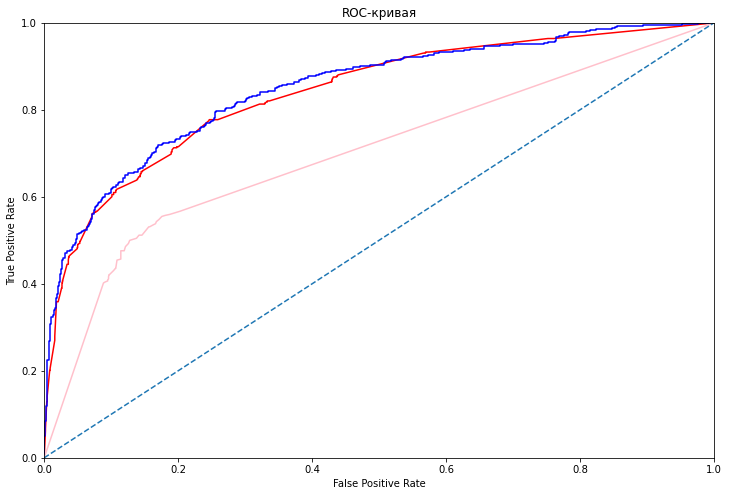

In [32]:
# Построим ROC-кривую для оценки моделей, построенных выше с лучшими параметрами 

#RandomForestClassifier: n_estimators=17,max_depth=19 красный график

fpr1, tpr1, thresholds1 = roc_curve(y_valid, probabilities_one_valid_forest_upsampled) 

#RandomForestClassifier: 'n_estimators'=299, max_depth=19 голубой график

fpr2, tpr2, thresholds2 = roc_curve(y_valid, probabilities_one_valid_forest_upsampled_2) 

#DecisionTreeClassifier max_depth=5 розовый график

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid_upsampled) 

plt.figure(figsize=(12,8))

plt.plot(fpr1, tpr1,color='red')

plt.plot(fpr2, tpr2,color='blue')

plt.plot(fpr, tpr, color='pink')

# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC-кривая")

plt.show()

**Три из четырех исследуемых моделей показали удовлетворительные значения метрик:**

**DecisionTreeClassifier с гиперпараметрами: depth=5 показала метрику F1=0.5963791267305644, метрику auc-roc: 0.8310244134068074**

**RandomForestClassifier с гиперпараметрами: n_estimators=17,max_depth=19 показала метрику F1=0.6082474226804123 , метрику auc-roc: 0.8384872579679288** 

**RandomForestClassifier с гиперпараметрами: n_estimators=299,max_depth=13 показала метрику F1=0.6151990349819059, метрику auc-roc: 0.8483915944325817. Эта модель показала наилучшие метрики качества.**  

## Тестирование модели

In [33]:
## проверим метрики лучшей модели на тестовой выборке

predicted_test_new2=model_forest_upsampled_2.predict(x_test)
result_forest_new2 = f1_score(y_test, predicted_test_new2)

probabilities_test_forest_new2 = model_forest_upsampled_2.predict_proba(x_test)
probabilities_one_test_forest_new2 = probabilities_test_forest_new2[:, 1]
    
auc_roc_forest_new2= roc_auc_score (y_test,probabilities_one_test_forest_new2) 

print(" F1: ",result_forest_new2," auc-roc:",auc_roc_forest_new2)

 F1:  0.6118500604594922  auc-roc: 0.8550064385949921


**Вывод: На тренировочной выборке, скорректированной техникой 'upsampling' для увеличения количества примеров положительного класса, обучена модель случайного леса (RandomForestClassifier) с гиперпараметрами n_estimators=299,max_depth=13, которая дала удовлетворительные показатели качества модели при тестировании на тестовой выборке,  F1:  0.61  auc-roc: 0.86, метрики, отображающие способность модели прогнозировать отток клиентов Банка** 




## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x ]  Весь код выполняется без ошибок
- [x ]  Ячейки с кодом расположены в порядке исполнения
- [x ]  Выполнен шаг 1: данные подготовлены
- [x ]  Выполнен шаг 2: задача исследована
    - [x ]  Исследован баланс классов
    - [x ]  Изучены модели без учёта дисбаланса
    - [x ]  Написаны выводы по результатам исследования
- [x ]  Выполнен шаг 3: учтён дисбаланс
    - [x ]  Применено несколько способов борьбы с дисбалансом
    - [x ]  Написаны выводы по результатам исследования
- [x ]  Выполнен шаг 4: проведено тестирование
- [x ]  Удалось достичь *F1*-меры не менее 0.59
- [x ]  Исследована метрика *AUC-ROC*